<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: SOBIA ALAMGIR</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/sobiahashmi) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.linkedin.com/in/sobia-alamgir-a027b939/) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/sobia-alamgir-a027b939/)
<!-- [![Streamlit](https://img.shields.io/badge/Streamlit-Open%20App-FF4B4B?style=for-the-badge&logo=streamlit&logoColor=white)](https://predict-podcast-listening-time-fgkp77kmvwwpruyistfzhj.streamlit.app/) -->



<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">AI Assistants in Student Life</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>

**Table of contents**<a id='toc0_'></a>    
  - [Step-01 Load Libraries](#toc1_1_)    
  - [Step-02 Load Dataset](#toc1_2_)    
  - [Step-03 Data Exploration and Preprocessing](#toc1_3_)    
    - [Remove unnecessory columns](#toc1_3_1_)    
    - [One Hot Encoding](#toc1_3_2_)    
    - [Label Encoding](#toc1_3_3_)    
    - [Outliers](#toc1_3_4_)    
      - [(i) Outliers Detection](#toc1_3_4_1_)    
      - [(ii) Visualize Outliers](#toc1_3_4_2_)    
      - [(iii) Outliers Removal](#toc1_3_4_3_)    
  - [Step-04 Data splitting into X and y](#toc1_4_)    
  - [Step-05 Model Selection](#toc1_5_)    
    - [RandomForestClassifier](#toc1_5_1_)    
    - [GradientBoostingClassifier](#toc1_5_2_)    
    - [ADA Boost](#toc1_5_3_)    
    - [Light GBM](#toc1_5_4_)    
    - [XGBClassifier](#toc1_5_5_)    
    - [CatBoostClassifier](#toc1_5_6_)    
    - [SVC](#toc1_5_7_)    
    - [XGBoost with Optuna](#toc1_5_8_)    
  - [Step-06 Save the Model](#toc1_6_)    
  - [Step-06 Model Prediction](#toc1_7_)    
  - [Step-07 Model Evaluation](#toc1_8_)    
  - [Step-08 Accuracy Visualization](#toc1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Step-01 Load Libraries](#toc0_)

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder

import optuna

import warnings
warnings.filterwarnings('ignore')

## <a id='toc1_2_'></a>[Step-02 Load Dataset](#toc0_)

In [ ]:
df = pd.read_csv("ai_assistant_usage_student_life.csv")
display(df.head())
print("Number of Records:", df.shape[0])
print("Number of Features:", df.shape[1])

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


Number of Records: 10000
Number of Features: 11


## <a id='toc1_3_'></a>[Step-03 Data Exploration and Preprocessing](#toc0_)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [35]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [36]:
df.isnull().sum()/len(df)*100

SessionID             0.0
StudentLevel          0.0
Discipline            0.0
SessionDate           0.0
SessionLengthMin      0.0
TotalPrompts          0.0
TaskType              0.0
AI_AssistanceLevel    0.0
FinalOutcome          0.0
UsedAgain             0.0
SatisfactionRating    0.0
dtype: float64

In [40]:
df.duplicated().sum()

0

In [41]:
df['StudentLevel'].value_counts()

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64

In [42]:
df['FinalOutcome'].value_counts()

FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64

In [43]:
df['TaskType'].value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

In [ ]:
df['UsedAgain'].value_counts()

UsedAgain
True     7064
False    2936
Name: count, dtype: int64

### <a id='toc1_3_1_'></a>[Remove unnecessory columns](#toc0_)

In [69]:
df.columns

Index(['SessionID', 'StudentLevel', 'Discipline', 'SessionDate',
       'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel',
       'FinalOutcome', 'UsedAgain', 'SatisfactionRating'],
      dtype='object')

In [95]:
df = df.drop(columns =['SessionID','SatisfactionRating','SessionDate'], axis=1)

In [ ]:
df.columns

Index(['StudentLevel', 'Discipline', 'SessionLengthMin', 'TotalPrompts',
       'TaskType', 'AI_AssistanceLevel', 'FinalOutcome', 'UsedAgain'],
      dtype='object')

### <a id='toc1_3_2_'></a>[One Hot Encoding](#toc0_)

In [97]:
df.head()

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain
0,Undergraduate,Computer Science,31.20,11,Studying,2,Assignment Completed,True
1,Undergraduate,Psychology,13.09,6,Studying,3,Assignment Completed,True
2,Undergraduate,Business,19.22,5,Coding,3,Assignment Completed,True
3,Undergraduate,Computer Science,3.70,1,Coding,3,Assignment Completed,True
4,Undergraduate,Psychology,28.12,9,Writing,3,Assignment Completed,True


In [100]:
df['StudentLevel'].value_counts()

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns = ['StudentLevel'], drop_first = True)

### <a id='toc1_3_3_'></a>[Label Encoding](#toc0_)

In [51]:
df.columns

Index(['SessionDate', 'SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel',
       'FinalOutcome', 'UsedAgain', 'StudentLevel_High School',
       'StudentLevel_Undergraduate', 'Discipline_Business',
       'Discipline_Computer Science', 'Discipline_Engineering',
       'Discipline_History', 'Discipline_Math', 'Discipline_Psychology',
       'TaskType_Coding', 'TaskType_Homework Help', 'TaskType_Research',
       'TaskType_Studying', 'TaskType_Writing'],
      dtype='object')

In [102]:
le = LabelEncoder()
df['TaskType'] = le.fit_transform(df['TaskType'])
df['Discipline'] = le.fit_transform(df['Discipline'])
df['FinalOutcome'] = le.fit_transform(df['FinalOutcome'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Discipline                  10000 non-null  int32  
 1   SessionLengthMin            10000 non-null  float64
 2   TotalPrompts                10000 non-null  int64  
 3   TaskType                    10000 non-null  int32  
 4   AI_AssistanceLevel          10000 non-null  int64  
 5   FinalOutcome                10000 non-null  int32  
 6   UsedAgain                   10000 non-null  bool   
 7   StudentLevel_High School    10000 non-null  bool   
 8   StudentLevel_Undergraduate  10000 non-null  bool   
dtypes: bool(3), float64(1), int32(3), int64(2)
memory usage: 381.0 KB


### <a id='toc1_3_4_'></a>[Outliers](#toc0_)

In [ ]:
df.columns

Index(['Discipline', 'SessionLengthMin', 'TotalPrompts', 'TaskType',
       'AI_AssistanceLevel', 'FinalOutcome', 'UsedAgain',
       'StudentLevel_High School', 'StudentLevel_Undergraduate'],
      dtype='object')

#### <a id='toc1_3_4_1_'></a>[(i) Outliers Detection](#toc0_)

In [ ]:
outlier_summary = {}

# Convert boolean columns to integers
df[['Discipline', 'SessionLengthMin', 'TotalPrompts', 'TaskType',
       'AI_AssistanceLevel', 'FinalOutcome', 'UsedAgain',
       'StudentLevel_High School', 'StudentLevel_Undergraduate']] = df[['Discipline', 'SessionLengthMin', 'TotalPrompts', 'TaskType',
       'AI_AssistanceLevel', 'FinalOutcome', 'UsedAgain',
       'StudentLevel_High School', 'StudentLevel_Undergraduate']].astype(int)


for col in ['Discipline', 'SessionLengthMin', 'TotalPrompts', 'TaskType',
       'AI_AssistanceLevel', 'FinalOutcome', 'UsedAgain',
       'StudentLevel_High School', 'StudentLevel_Undergraduate']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# View how many outliers each column has
print(outlier_summary)

{'Discipline': 0, 'SessionLengthMin': 309, 'TotalPrompts': 265, 'TaskType': 0, 'AI_AssistanceLevel': 241, 'FinalOutcome': 0, 'UsedAgain': 0, 'StudentLevel_High School': 2027, 'StudentLevel_Undergraduate': 0}


#### <a id='toc1_3_4_2_'></a>[(ii) Visualize Outliers](#toc0_)

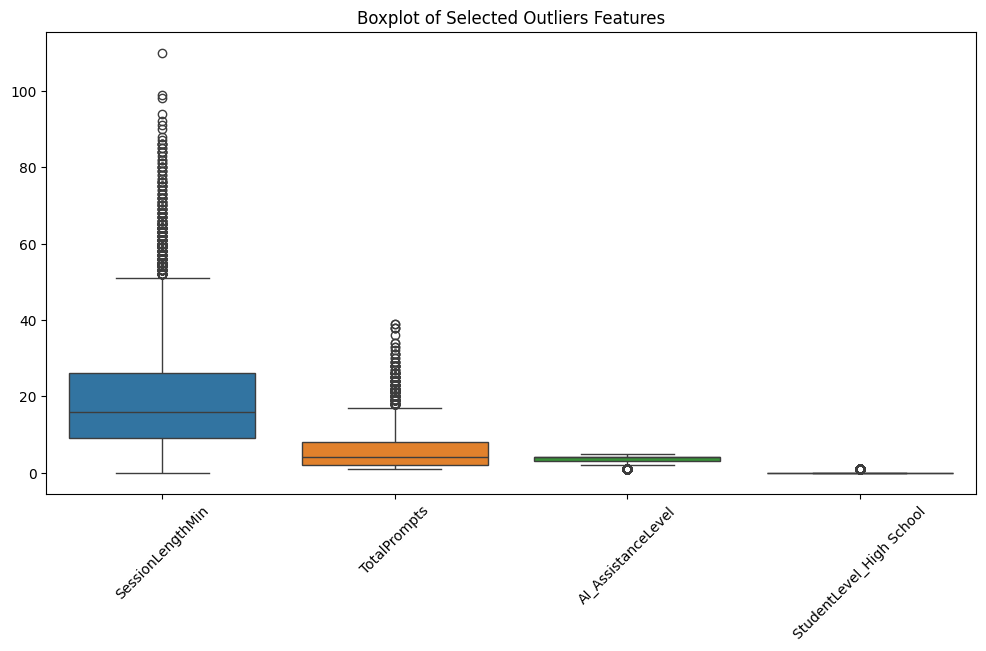

In [ ]:
features = ['SessionLengthMin','TotalPrompts','AI_AssistanceLevel', 'StudentLevel_High School']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features])
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Outliers Features")
plt.show()

#### <a id='toc1_3_4_3_'></a>[(iii) Outliers Removal](#toc0_)

In [108]:
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df_cleaned.head()
df_cleaned.shape

(7973, 9)

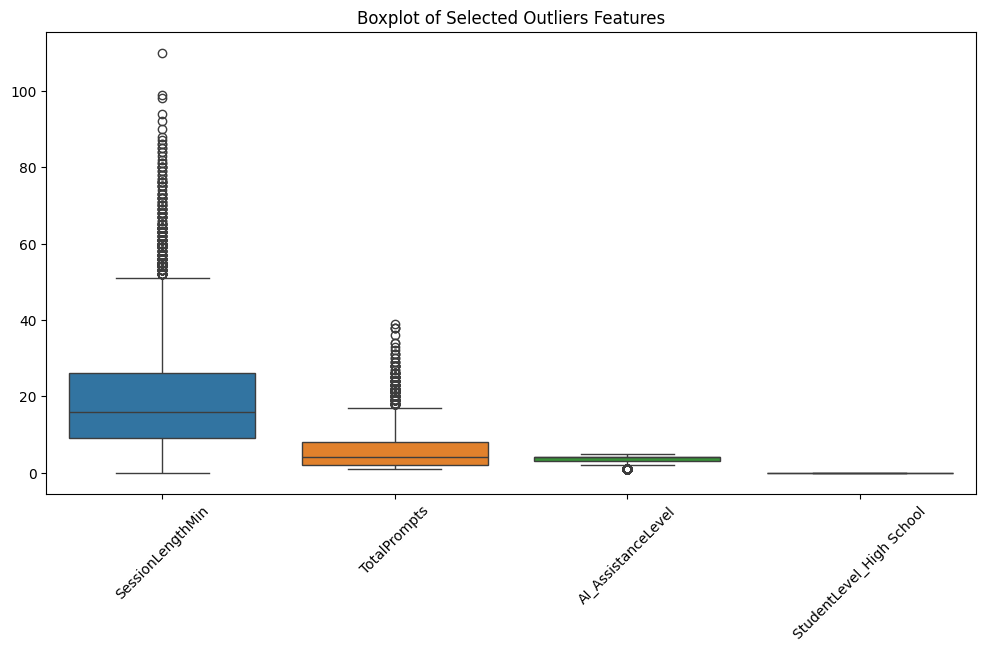

In [ ]:
features = ['SessionLengthMin','TotalPrompts','AI_AssistanceLevel', 'StudentLevel_High School']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[features])
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Outliers Features")
plt.show()

## <a id='toc1_4_'></a>[Step-04 Data splitting into X and y](#toc0_)

In [175]:
df_cleaned.columns

Index(['Discipline', 'SessionLengthMin', 'TotalPrompts', 'TaskType',
       'AI_AssistanceLevel', 'FinalOutcome', 'UsedAgain',
       'StudentLevel_High School', 'StudentLevel_Undergraduate'],
      dtype='object')

In [149]:
X = df_cleaned.drop(['FinalOutcome'], axis = 1)
y = df_cleaned['FinalOutcome']

In [150]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(6378, 1595, 6378, 1595)

## <a id='toc1_5_'></a>[Step-05 Model Selection](#toc0_)

### <a id='toc1_5_1_'></a>[RandomForestClassifier](#toc0_)

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

### <a id='toc1_5_2_'></a>[GradientBoostingClassifier](#toc0_)

In [ ]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier()

### <a id='toc1_5_3_'></a>[ADA Boost](#toc0_)

In [ ]:
model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

### <a id='toc1_5_4_'></a>[Light GBM](#toc0_)

In [ ]:
model_light = LGBMClassifier(random_state=42)
model_light.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 6378, number of used features: 7
[LightGBM] [Info] Start training from score -0.745613
[LightGBM] [Info] Start training from score -1.826213
[LightGBM] [Info] Start training from score -2.586824
[LightGBM] [Info] Start training from score -1.240375


LGBMClassifier(random_state=42)

### <a id='toc1_5_5_'></a>[XGBClassifier](#toc0_)

In [ ]:
model_xgboost = XGBClassifier(random_state=42)
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### <a id='toc1_5_6_'></a>[CatBoostClassifier](#toc0_)

In [ ]:
model_cat = CatBoostClassifier(random_state=42)
model_cat.fit(X_train, y_train)

Learning rate set to 0.086969
0:	learn: 1.3464734	total: 16.7ms	remaining: 16.7s
1:	learn: 1.3109020	total: 27ms	remaining: 13.5s
2:	learn: 1.2844498	total: 32.4ms	remaining: 10.8s
3:	learn: 1.2614008	total: 39.5ms	remaining: 9.83s
4:	learn: 1.2427358	total: 46.3ms	remaining: 9.21s
5:	learn: 1.2257534	total: 55.5ms	remaining: 9.19s
6:	learn: 1.2111127	total: 64.9ms	remaining: 9.2s
7:	learn: 1.1993182	total: 75.3ms	remaining: 9.34s
8:	learn: 1.1868699	total: 85.9ms	remaining: 9.46s
9:	learn: 1.1773778	total: 149ms	remaining: 14.7s
10:	learn: 1.1698876	total: 154ms	remaining: 13.8s
11:	learn: 1.1620265	total: 171ms	remaining: 14.1s
12:	learn: 1.1548553	total: 179ms	remaining: 13.6s
13:	learn: 1.1488020	total: 188ms	remaining: 13.3s
14:	learn: 1.1428328	total: 197ms	remaining: 12.9s
15:	learn: 1.1385328	total: 208ms	remaining: 12.8s
16:	learn: 1.1352150	total: 214ms	remaining: 12.4s
17:	learn: 1.1309180	total: 224ms	remaining: 12.2s
18:	learn: 1.1268446	total: 233ms	remaining: 12.1s
19:	l

### <a id='toc1_5_7_'></a>[SVC](#toc0_)

In [ ]:
model_svc = SVC(random_state=42)
model_svc.fit(X_train, y_train)

SVC(random_state=42)

### <a id='toc1_5_8_'></a>[XGBoost with Optuna](#toc0_)

In [155]:
# Step-01 Define Objective Function
def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",  # Use "multi:softprob" for multiclass
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True)
    }

    model_xgboost_optuna = XGBClassifier(**param)
    model_xgboost_optuna.fit(X_train, y_train)
    y_pred_optuna = model_xgboost_optuna.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_optuna)
    return accuracy  # Higher is better

In [156]:
# Step-02 Define Optuna Study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2025-07-20 20:30:48,035] A new study created in memory with name: no-name-643c556d-be53-4de1-9ed6-f026d32505c8
[I 2025-07-20 20:30:52,971] Trial 0 finished with value: 0.5141065830721003 and parameters: {'n_estimators': 593, 'max_depth': 12, 'learning_rate': 0.0010830049734004063, 'gamma': 2.182265818662041, 'subsample': 0.8632647282269962, 'colsample_bytree': 0.8520612088910998, 'reg_alpha': 0.00013313219907325766, 'reg_lambda': 0.09649308857984716}. Best is trial 0 with value: 0.5141065830721003.
[I 2025-07-20 20:30:53,941] Trial 1 finished with value: 0.5128526645768025 and parameters: {'n_estimators': 176, 'max_depth': 3, 'learning_rate': 0.011191990953727018, 'gamma': 2.9481970836355273, 'subsample': 0.8925292867690561, 'colsample_bytree': 0.5052325060623292, 'reg_alpha': 1.7711828803872637e-06, 'reg_lambda': 0.017156749555469083}. Best is trial 0 with value: 0.5141065830721003.
[I 2025-07-20 20:30:55,360] Trial 2 finished with value: 0.5184952978056426 and parameters: {'n_esti

In [ ]:
# Step-03 Print Best Params
# Best trial
print("Best Trial:")
print(study.best_trial.params)

# Train final model with best params
model_xgboost_optuna = XGBClassifier(**study.best_trial.params)
model_xgboost_optuna.fit(X_train, y_train)

Best Trial:
{'n_estimators': 127, 'max_depth': 5, 'learning_rate': 0.297837182722532, 'gamma': 3.936203304009834, 'subsample': 0.7670510364187427, 'colsample_bytree': 0.704030302029489, 'reg_alpha': 1.888645065545533, 'reg_lambda': 2.855119579981904e-07}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.704030302029489, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3.936203304009834,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.297837182722532,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=127, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### ADA Boost with Optuna

In [176]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0, log=True)
    max_depth = trial.suggest_int("max_depth", 1, 10)

    base_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    model = AdaBoostClassifier(
        estimator=base_model,  # <-- updated from base_estimator
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )

    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()


In [179]:
# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2025-07-20 21:47:00,190] A new study created in memory with name: no-name-a4e23433-59d7-477c-94dd-a2902ddc4f95
[I 2025-07-20 21:47:24,171] Trial 0 finished with value: 0.4300721229225462 and parameters: {'n_estimators': 247, 'learning_rate': 0.13437074914117672, 'max_depth': 10}. Best is trial 0 with value: 0.4300721229225462.
[I 2025-07-20 21:47:32,123] Trial 1 finished with value: 0.4629978049545312 and parameters: {'n_estimators': 192, 'learning_rate': 0.7354436677395989, 'max_depth': 2}. Best is trial 1 with value: 0.4629978049545312.
[I 2025-07-20 21:47:52,253] Trial 2 finished with value: 0.4397930385700846 and parameters: {'n_estimators': 225, 'learning_rate': 0.11289506843112145, 'max_depth': 7}. Best is trial 1 with value: 0.4629978049545312.
[I 2025-07-20 21:47:57,838] Trial 3 finished with value: 0.48259642521166507 and parameters: {'n_estimators': 66, 'learning_rate': 0.15696934764923057, 'max_depth': 3}. Best is trial 3 with value: 0.48259642521166507.
[I 2025-07-20 21:

In [180]:
print("Best Trial:")
print(study.best_trial)

Best Trial:
FrozenTrial(number=23, state=1, values=[0.4916901850109752], datetime_start=datetime.datetime(2025, 7, 20, 21, 51, 41, 952997), datetime_complete=datetime.datetime(2025, 7, 20, 21, 51, 54, 709875), params={'n_estimators': 218, 'learning_rate': 0.02780618991297787, 'max_depth': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=1.0, log=True, low=0.01, step=None), 'max_depth': IntDistribution(high=10, log=False, low=1, step=1)}, trial_id=23, value=None)


In [181]:
# Train the final model
best_params = study.best_params
model_ada_optuna = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=best_params["max_depth"], random_state=42),
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    random_state=42
)
model_ada_optuna.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=0.02780618991297787, n_estimators=218,
                   random_state=42)

## <a id='toc1_6_'></a>[Step-06 Save the Model](#toc0_)

In [182]:
import joblib
joblib.dump(model_xgboost_optuna, "model_xgb_optuna.pkl")
joblib.dump(model_ada_optuna, "model_ada_optuna.pkl")

['model_ada_optuna.pkl']

In [183]:
joblib.load("model_xgb_optuna.pkl")
joblib.load("model_ada_optuna.pkl")

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=0.02780618991297787, n_estimators=218,
                   random_state=42)

## <a id='toc1_7_'></a>[Step-06 Model Prediction](#toc0_)

In [184]:
y_pred_rf = model_rf.predict(X_test)
y_pred_gbc = model_gbc.predict(X_test)

y_pred_ada = model_ada.predict(X_test)
y_pred_light = model_light.predict(X_test)
y_pred_xgboost = model_xgboost.predict(X_test)
y_pred_cat = model_cat.predict(X_test)
y_pred_svc = model_svc.predict(X_test)
y_pred_xgboost_optuna = model_xgboost_optuna.predict(X_test)
y_pred_ada_optuna = model_ada_optuna.predict(X_test)

## <a id='toc1_8_'></a>[Step-07 Model Evaluation](#toc0_)

In [185]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_gbc = accuracy_score(y_test, y_pred_gbc)
acc_ada = accuracy_score(y_test, y_pred_ada)
acc_light = accuracy_score(y_test, y_pred_light)
acc_xgboost = accuracy_score(y_test, y_pred_xgboost)
acc_cat = accuracy_score(y_test, y_pred_cat)
acc_svc = accuracy_score(y_test, y_pred_svc)
acc_xgboost_optuna = accuracy_score(y_test, y_pred_xgboost_optuna)
acc_ada_optuna = accuracy_score(y_test, y_pred_ada_optuna)

cf_rf = confusion_matrix(y_test, y_pred_rf)
cf_gbc = confusion_matrix(y_test, y_pred_gbc)

cr_rf = classification_report(y_test, y_pred_rf)
cr_gbc = classification_report(y_test, y_pred_gbc)

print(f"Accuracy of Random Forest: {acc_rf:.2f}")
print(f"Accuracy of Gradient Boosting: {acc_gbc:.2f}")
print(f"Accuracy of AdaBoost: {acc_ada:.2f}")
print(f"Accuracy of LightGBM: {acc_light:.2f}")
print(f"Accuracy of XGBoost: {acc_xgboost:.2f}")
print(f"Accuracy of CatBoost: {acc_cat:.2f}")
print(f"Accuracy of SVC: {acc_svc:.2f}")
print(f"Accuracy of XGBoost Optuna: {acc_xgboost_optuna:.2f}")
print(f"Accuracy of AdaBoost Optuna: {acc_ada_optuna:.2f}")


print()
print(f"Confusion Matrix of Random Forest: \n{cf_rf}")
print(f"Confusion Matrix of Gradient Boosting: \n{cf_gbc}")

print()
print(f"Classification Report of Random Forest: \n{cr_rf}")
print(f"Classification Report of Gradient Boosting: \n{cr_gbc}")

Accuracy of Random Forest: 0.44
Accuracy of Gradient Boosting: 0.52
Accuracy of AdaBoost: 0.52
Accuracy of LightGBM: 0.50
Accuracy of XGBoost: 0.48
Accuracy of CatBoost: 0.49
Accuracy of SVC: 0.50
Accuracy of XGBoost Optuna: 0.53
Accuracy of AdaBoost Optuna: 0.52

Confusion Matrix of Random Forest: 
[[485  73  30 206]
 [106  82  19  44]
 [ 57  35  12  22]
 [247  46  11 120]]
Confusion Matrix of Gradient Boosting: 
[[653  61   4  76]
 [131  95   2  23]
 [ 59  50   2  15]
 [316  33   3  72]]

Classification Report of Random Forest: 
              precision    recall  f1-score   support

           0       0.54      0.61      0.57       794
           1       0.35      0.33      0.34       251
           2       0.17      0.10      0.12       126
           3       0.31      0.28      0.29       424

    accuracy                           0.44      1595
   macro avg       0.34      0.33      0.33      1595
weighted avg       0.42      0.44      0.43      1595

Classification Report of Gra

## <a id='toc1_9_'></a>[Step-08 Accuracy Visualization](#toc0_)

In [163]:
y_pred_rf = model_rf.predict(X_test)
y_pred_gbc = model_gbc.predict(X_test)

y_pred_ada = model_ada.predict(X_test)
y_pred_light = model_light.predict(X_test)
y_pred_xgboost = model_xgboost.predict(X_test)
y_pred_cat = model_cat.predict(X_test)
y_pred_svc = model_svc.predict(X_test)
y_pred_xgboost_optuna = model_xgboost_optuna.predict(X_test)

In [186]:
models = { "Random Forest": model_rf , "Gradient Boosting": model_gbc, "AdaBoost":model_ada, "LightGBM":model_light,\
     "XGBoost":model_xgboost, "CatBoost":model_cat, "SVC":model_svc, "XGBoost Optuna":model_xgboost_optuna, "AdaBoost Optuna":model_ada_optuna}

In [187]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc * 100  # convert to percentage

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 6378, number of used features: 7
[LightGBM] [Info] Start training from score -0.745613
[LightGBM] [Info] Start training from score -1.826213
[LightGBM] [Info] Start training from score -2.586824
[LightGBM] [Info] Start training from score -1.240375
Learning rate set to 0.086969
0:	learn: 1.3464734	total: 15.8ms	remaining: 15.8s
1:	learn: 1.3109020	total: 24.8ms	remaining: 12.4s
2:	learn: 1.2844498	total: 30.7ms	remaining: 10.2s
3:	learn: 1.2614008	total: 37.4ms	remaining: 9.32s
4:	learn: 1.2427358	total: 42.8ms	remaining: 8.52s
5:	learn: 1.2257534	total: 53.8ms	remaining: 8.91s
6:	learn: 1.211112

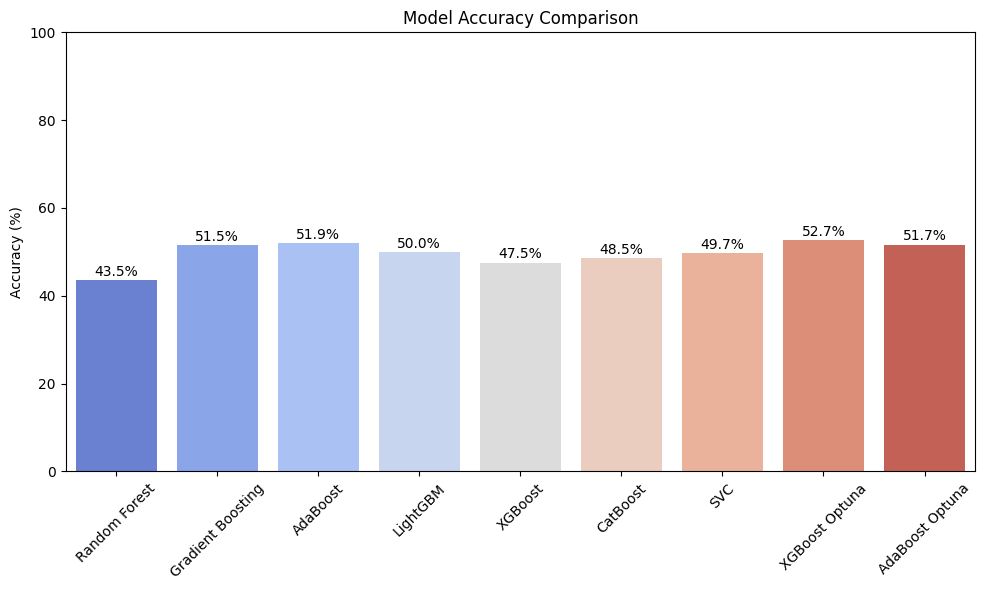

In [188]:
# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for i, v in enumerate(results.values()):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.show()